In [1]:
import matplotlib

matplotlib.use("TkAgg")
import shmistogram as sh

%matplotlib inline

In [2]:
""" Simulate several mixtures of Cauchy distributions of increasing size """
datas = {"o" + str(k): sh.simulations.cauchy_mixture(n=10**k) for k in range(1, 5)}

In [3]:
""" Compute each type of binner on each data set """
metrics = sh.binners.ScalabilityTesting(data_sets=datas, bin_methods=["det", "bayesblocks"])

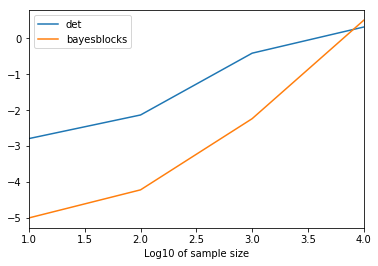

In [4]:
metrics.plot(target="time", log=True)

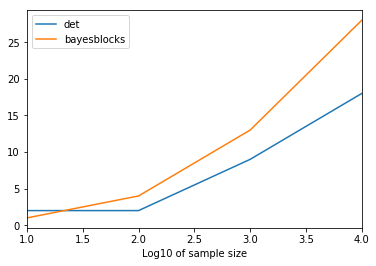

In [5]:
metrics.plot(target="n_bins")